In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Hello World")

oi


In [3]:
df_orders = pd.read_csv('olist_orders_dataset.csv')

#df_orders.head

In [5]:
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

#df_orders.head

In [6]:
df = pd.merge(df_orders,df_reviews,how="inner",on="order_id")

df = df.dropna()
#df.head

In [7]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [9]:
df['days_for_delivery'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']) / np.timedelta64(1, 'D')
df['days_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']) / np.timedelta64(1, 'D')
df[['days_for_delivery', 'days_delay']].head

<bound method NDFrame.head of        days_for_delivery  days_delay
1              13.782037   -5.355729
15             13.855093  -12.351019
23              4.277627   -3.233021
25             12.639375  -31.360475
30             18.633970   -9.480162
...                  ...         ...
99144           6.218993  -29.402222
99152           1.432269   -3.049688
99160           8.006968  -16.264792
99178           2.127083   -3.328738
99210           6.150058  -16.278831

[9500 rows x 2 columns]>

In [11]:
df1 = df.query("review_score == 1")
df2 = df.query("review_score == 2")
df3 = df.query("review_score == 3")
df4 = df.query("review_score == 4")
df5 = df.query("review_score == 5")

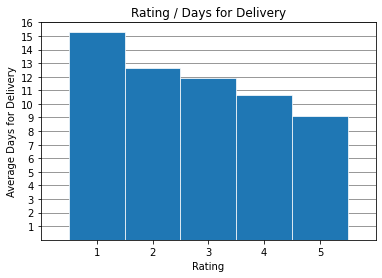

In [12]:
# plot

x = [1,2,3,4,5]
y = [df1["days_for_delivery"].mean(),df2["days_for_delivery"].mean(),df3["days_for_delivery"].mean(),df4["days_for_delivery"].mean(),df5["days_for_delivery"].mean()]

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 6), xticks=np.arange(1, 6),ylim=(0, 16), yticks=np.arange(1, 17))

plt.xlabel('Rating')
plt.ylabel('Average Days for Delivery')
plt.title('Rating / Days for Delivery')
ax.set_axisbelow(True)
ax.grid(axis = 'y',color='gray')

plt.show()

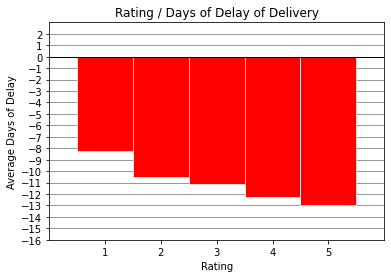

In [13]:
# plot

x = [1,2,3,4,5]
y = [df1["days_delay"].mean(),df2["days_delay"].mean(),df3["days_delay"].mean(),df4["days_delay"].mean(),df5["days_delay"].mean()]

fig, ax = plt.subplots()

ax.bar(x, y, width=1, color = "red",edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 6), xticks=np.arange(1, 6),ylim=(-16, 3), yticks=np.arange(-16, 3))

plt.xlabel('Rating')
plt.ylabel('Average Days of Delay')
plt.title('Rating / Days of Delay of Delivery')
ax.set_axisbelow(True)
ax.grid(axis = 'y',color='gray')
plt.axhline(linewidth=1,y=0,color='black')

plt.show()

In [17]:
docs1 = df1["review_comment_message"].values.tolist()
docs2 = df2["review_comment_message"].values.tolist()
docs3 = df3["review_comment_message"].values.tolist()
docs4 = df4["review_comment_message"].values.tolist()
docs5 = df5["review_comment_message"].values.tolist()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from pprint import pprint

vectorizer = TfidfVectorizer()

# Compute the TF-IDF matrix
tfidf = vectorizer.fit_transform(df1["review_comment_message"])

print(tfidf)

# print(tfidf_matrix_idea_word)

#j = vectorizer.vocabulary_['put']

#for i in range(tfidf.shape[0]):
#    print(tfidf[i, j])

  (0, 1774)	0.24266000828730977
  (0, 766)	0.1292946730616149
  (0, 1446)	0.27569772299589135
  (0, 2509)	0.13220659890292538
  (0, 576)	0.200721523829635
  (0, 1920)	0.27569772299589135
  (0, 2987)	0.16111003578792932
  (0, 2364)	0.1861021021766814
  (0, 225)	0.11769967634354923
  (0, 6)	0.200721523829635
  (0, 37)	0.2055361224070377
  (0, 1114)	0.14180142761528425
  (0, 1052)	0.21109416856543353
  (0, 2879)	0.19452530295405468
  (0, 1624)	0.15428673945036703
  (0, 1963)	0.1325451547259567
  (0, 1819)	0.26107830134293775
  (0, 237)	0.26107830134293775
  (0, 478)	0.26107830134293775
  (0, 2453)	0.10947419757492556
  (0, 728)	0.23608623495418565
  (0, 985)	0.0747885259216981
  (0, 2747)	0.26107830134293775
  (0, 2730)	0.060260616831171114
  (0, 2862)	0.08359619152335027
  :	:
  (1537, 2800)	0.07262541905431706
  (1537, 3409)	0.16712039643123044
  (1537, 1633)	0.09197507212633584
  (1537, 985)	0.0674091809002288
  (1537, 2730)	0.05431473305657518
  (1537, 2862)	0.07534779871002628
  (153

In [19]:
def get_term(dict, search_index):
    return list(dict.keys())[list(dict.values()).index(search_index)]

In [20]:
def word_frequencies(tfidf):
    tfidfadd = []
    words = []
    for j in range(tfidf.shape[1]):
        words.append(get_term(vectorizer.vocabulary_,j))
        tfidfadd.append(0)
        for i in range(tfidf.shape[0]):            
            tfidfadd[j] += tfidf[i, j]
    return tfidfadd, words

In [93]:
import operator
import heapq


def get_top_words(n,tfidf):
    tfdfadd, words = word_frequencies(tfidf)
    return get_top(n,tfdfadd,words)

def get_top(n,tfidfadd,words):
    stopwords = ["de","que", "em","do", "da", "para", "com", "um", "não", "uma", "os", "no", "se", "na", "por", "mais", "as", "dos", "como", "mas", "foi", "ao", "ele", "das", "tem", "sua", "ser", "entre", "também", "são", "mesmo", "já", "está", "pela", "ainda", "só", "sobre", "muito", "onde", "mesmo", "nos", "sem", "aos", "seus", "quem", "nas", "quando", "tudo", "sem", "assim", "ter", "mas", "há", "porque", "essa", "assim", "nem", "eles", "agora", "antes", "depois", "sempre", "todos", "outro", "qualquer", "além", "até", "cada", "desde", "então", "menos", "mesmo", "apenas", "outro",  "quase", "já", "nunca", "sempre", "tão", "talvez", "também", "outros", "apenas", "somente", "tinha", "foram", "grande", "pouco", "tinha", "tive", "teve", "durante", "através"]
    sw = []
    for stopword in stopwords:
        sw.append(words.index(stopword))
    

    tops = list(list(zip(*heapq.nlargest(n, enumerate(tfidfadd), key=operator.itemgetter(1))))[0])
    print(tops)
    
    for word in list(tops):  # iterating on a copy since removing will mess things up
        if word in sw:
            tops.remove(word)
            print(tops)
    res = 0
    while (len(tops) < n):
        res += n - len(tops)
        tops = list(list(zip(*heapq.nlargest(n+res, enumerate(tfidfadd), key=operator.itemgetter(1))))[0])
        for word in list(tops):
            if word in sw:
                tops.remove(word)
        
    
    values = []
    labels = []
    tot = 0

    for j in range(len(tfidfadd)):
        if j in tops:
            values.append(tfidfadd[j]/len(tfidfadd))
            labels.append(words[j])
        else:
            tot += tfidfadd[j]/len(tfidfadd)
    #values.append(tot)
    #labels.append("Other")
    return values, labels

In [31]:
tfdfadd, words = word_frequencies(tfidf)
print("foi")

[2347, 2730, 2862, 985, 2800, 1172, 3409, 737, 779, 3466, 225, 1633, 1327, 3410, 668, 2318, 2190, 965, 2453, 2278, 2273, 3218, 1471, 1449, 411, 1316, 1238, 2145, 2140, 2509]
[2730, 2862, 985, 2800, 1172, 3409, 737, 779, 3466, 225, 1633, 1327, 3410, 668, 2318, 2190, 965, 2453, 2278, 2273, 3218, 1471, 1449, 411, 1316, 1238, 2145, 2140, 2509]
[2730, 2862, 2800, 1172, 3409, 737, 779, 3466, 225, 1633, 1327, 3410, 668, 2318, 2190, 965, 2453, 2278, 2273, 3218, 1471, 1449, 411, 1316, 1238, 2145, 2140, 2509]
[2730, 2862, 1172, 3409, 737, 779, 3466, 225, 1633, 1327, 3410, 668, 2318, 2190, 965, 2453, 2278, 2273, 3218, 1471, 1449, 411, 1316, 1238, 2145, 2140, 2509]
[2730, 2862, 3409, 737, 779, 3466, 225, 1633, 1327, 3410, 668, 2318, 2190, 965, 2453, 2278, 2273, 3218, 1471, 1449, 411, 1316, 1238, 2145, 2140, 2509]
[2730, 2862, 737, 779, 3466, 225, 1633, 1327, 3410, 668, 2318, 2190, 965, 2453, 2278, 2273, 3218, 1471, 1449, 411, 1316, 1238, 2145, 2140, 2509]
[2730, 2862, 779, 3466, 225, 1633, 1327, 3

<BarContainer object of 30 artists>

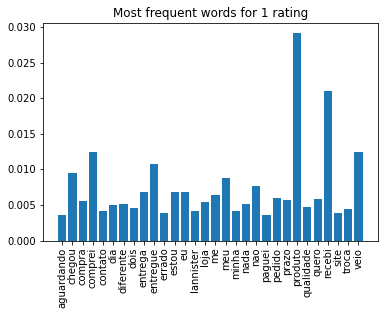

In [97]:
values, labels = get_top(30,tfdfadd,words)

#fig, ax = plt.subplots()
plt.title("Most frequent words / Rating = 1")
plt.xticks(rotation='vertical')
plt.bar(labels,values)